In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
root_path='gdrive/My Drive/project2/'

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/project2/new plant disease.zip', 'r') as zipObj:
  zipObj.extractall()
  print('Done')

Done


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [14]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 169s 73ms/step - loss: 1.3969 - accuracy: 0.5898 - val_loss: 0.4727 - val_accuracy: 0.8504
Epoch 2/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.4586 - accuracy: 0.8540 - val_loss: 0.2907 - val_accuracy: 0.9061
Epoch 3/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.2770 - accuracy: 0.9110 - val_loss: 0.2427 - val_accuracy: 0.9205
Epoch 4/10
2197/2197 [==============================] - 157s 71ms/step - loss: 0.1856 - accuracy: 0.9393 - val_loss: 0.1963 - val_accuracy: 0.9378
Epoch 5/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.1430 - accuracy: 0.9535 - val_loss: 0.1517 - val_accuracy: 0.9522
Epoch 6/10
2197/2197 [==============================] - 158s 72ms/step - loss: 0.1125 - accuracy: 0.9634 - val_loss: 0.1362 - val_accuracy: 0.9566
Epoch 7/10
2197/2197 [==============================] - 167s 76ms/step - loss: 0.0905 - accuracy: 0.9702 - val_loss: 0

In [15]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 55s 25ms/step - loss: 0.0301 - accuracy: 0.9899
Training accuracy: 0.9898996949195862


In [16]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 13s 23ms/step - loss: 0.1295 - accuracy: 0.9606
Validation accuracy: 0.9606191515922546


In [17]:
cnn.save('trained_plant_disease_model.keras')

In [18]:
training_history.history #Return Dictionary of history

{'loss': [1.3968983888626099,
  0.45861342549324036,
  0.27696213126182556,
  0.18564432859420776,
  0.1429925113916397,
  0.1124982237815857,
  0.09045752882957458,
  0.07394684106111526,
  0.06788123399019241,
  0.05651149898767471],
 'accuracy': [0.5897716879844666,
  0.8539583086967468,
  0.9109894037246704,
  0.9393413662910461,
  0.9535244107246399,
  0.9633828997612,
  0.97022545337677,
  0.9760295748710632,
  0.9778220653533936,
  0.9820044040679932],
 'val_loss': [0.4726506471633911,
  0.2907375991344452,
  0.24274763464927673,
  0.19629716873168945,
  0.151715487241745,
  0.1362292766571045,
  0.1472959965467453,
  0.11896815150976181,
  0.11394508183002472,
  0.12950296700000763],
 'val_accuracy': [0.8504438996315002,
  0.9061006307601929,
  0.9204985499382019,
  0.937798798084259,
  0.9521966576576233,
  0.9566355347633362,
  0.9556112289428711,
  0.9613589644432068,
  0.9644320607185364,
  0.9606191515922546]}

In [19]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [20]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [21]:
training_history.history['accuracy']

[0.5897716879844666,
 0.8539583086967468,
 0.9109894037246704,
 0.9393413662910461,
 0.9535244107246399,
 0.9633828997612,
 0.97022545337677,
 0.9760295748710632,
 0.9778220653533936,
 0.9820044040679932]

In [22]:
training_history.history['val_accuracy']

[0.8504438996315002,
 0.9061006307601929,
 0.9204985499382019,
 0.937798798084259,
 0.9521966576576233,
 0.9566355347633362,
 0.9556112289428711,
 0.9613589644432068,
 0.9644320607185364,
 0.9606191515922546]

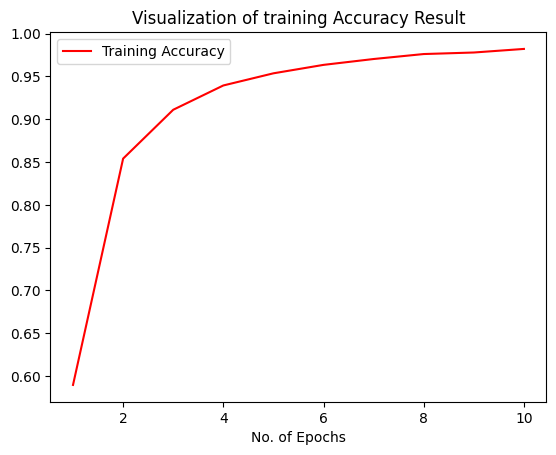

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of training Accuracy Result')
plt.legend()
plt.show()

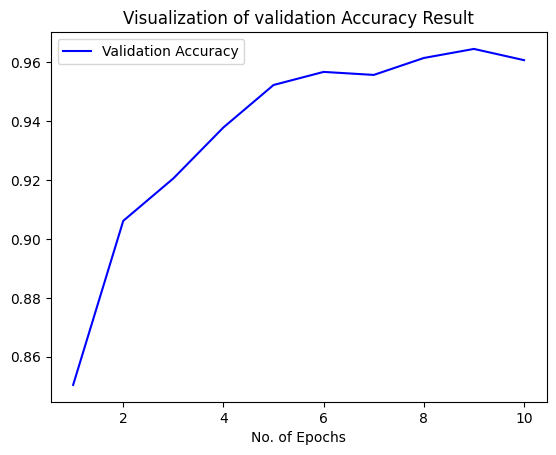

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of validation Accuracy Result')
plt.legend()
plt.show()

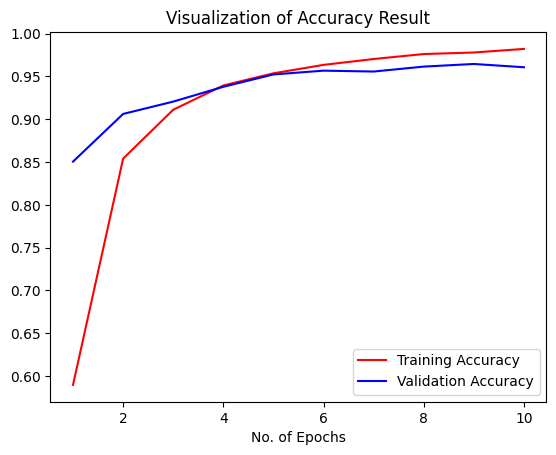

In [25]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 56s 3ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [30]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.98      0.98       440
                                   Apple___healthy       0.98      0.95      0.96       502
                               Blueberry___healthy       0.99      0.95      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.89      0.93       410
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.97      0.

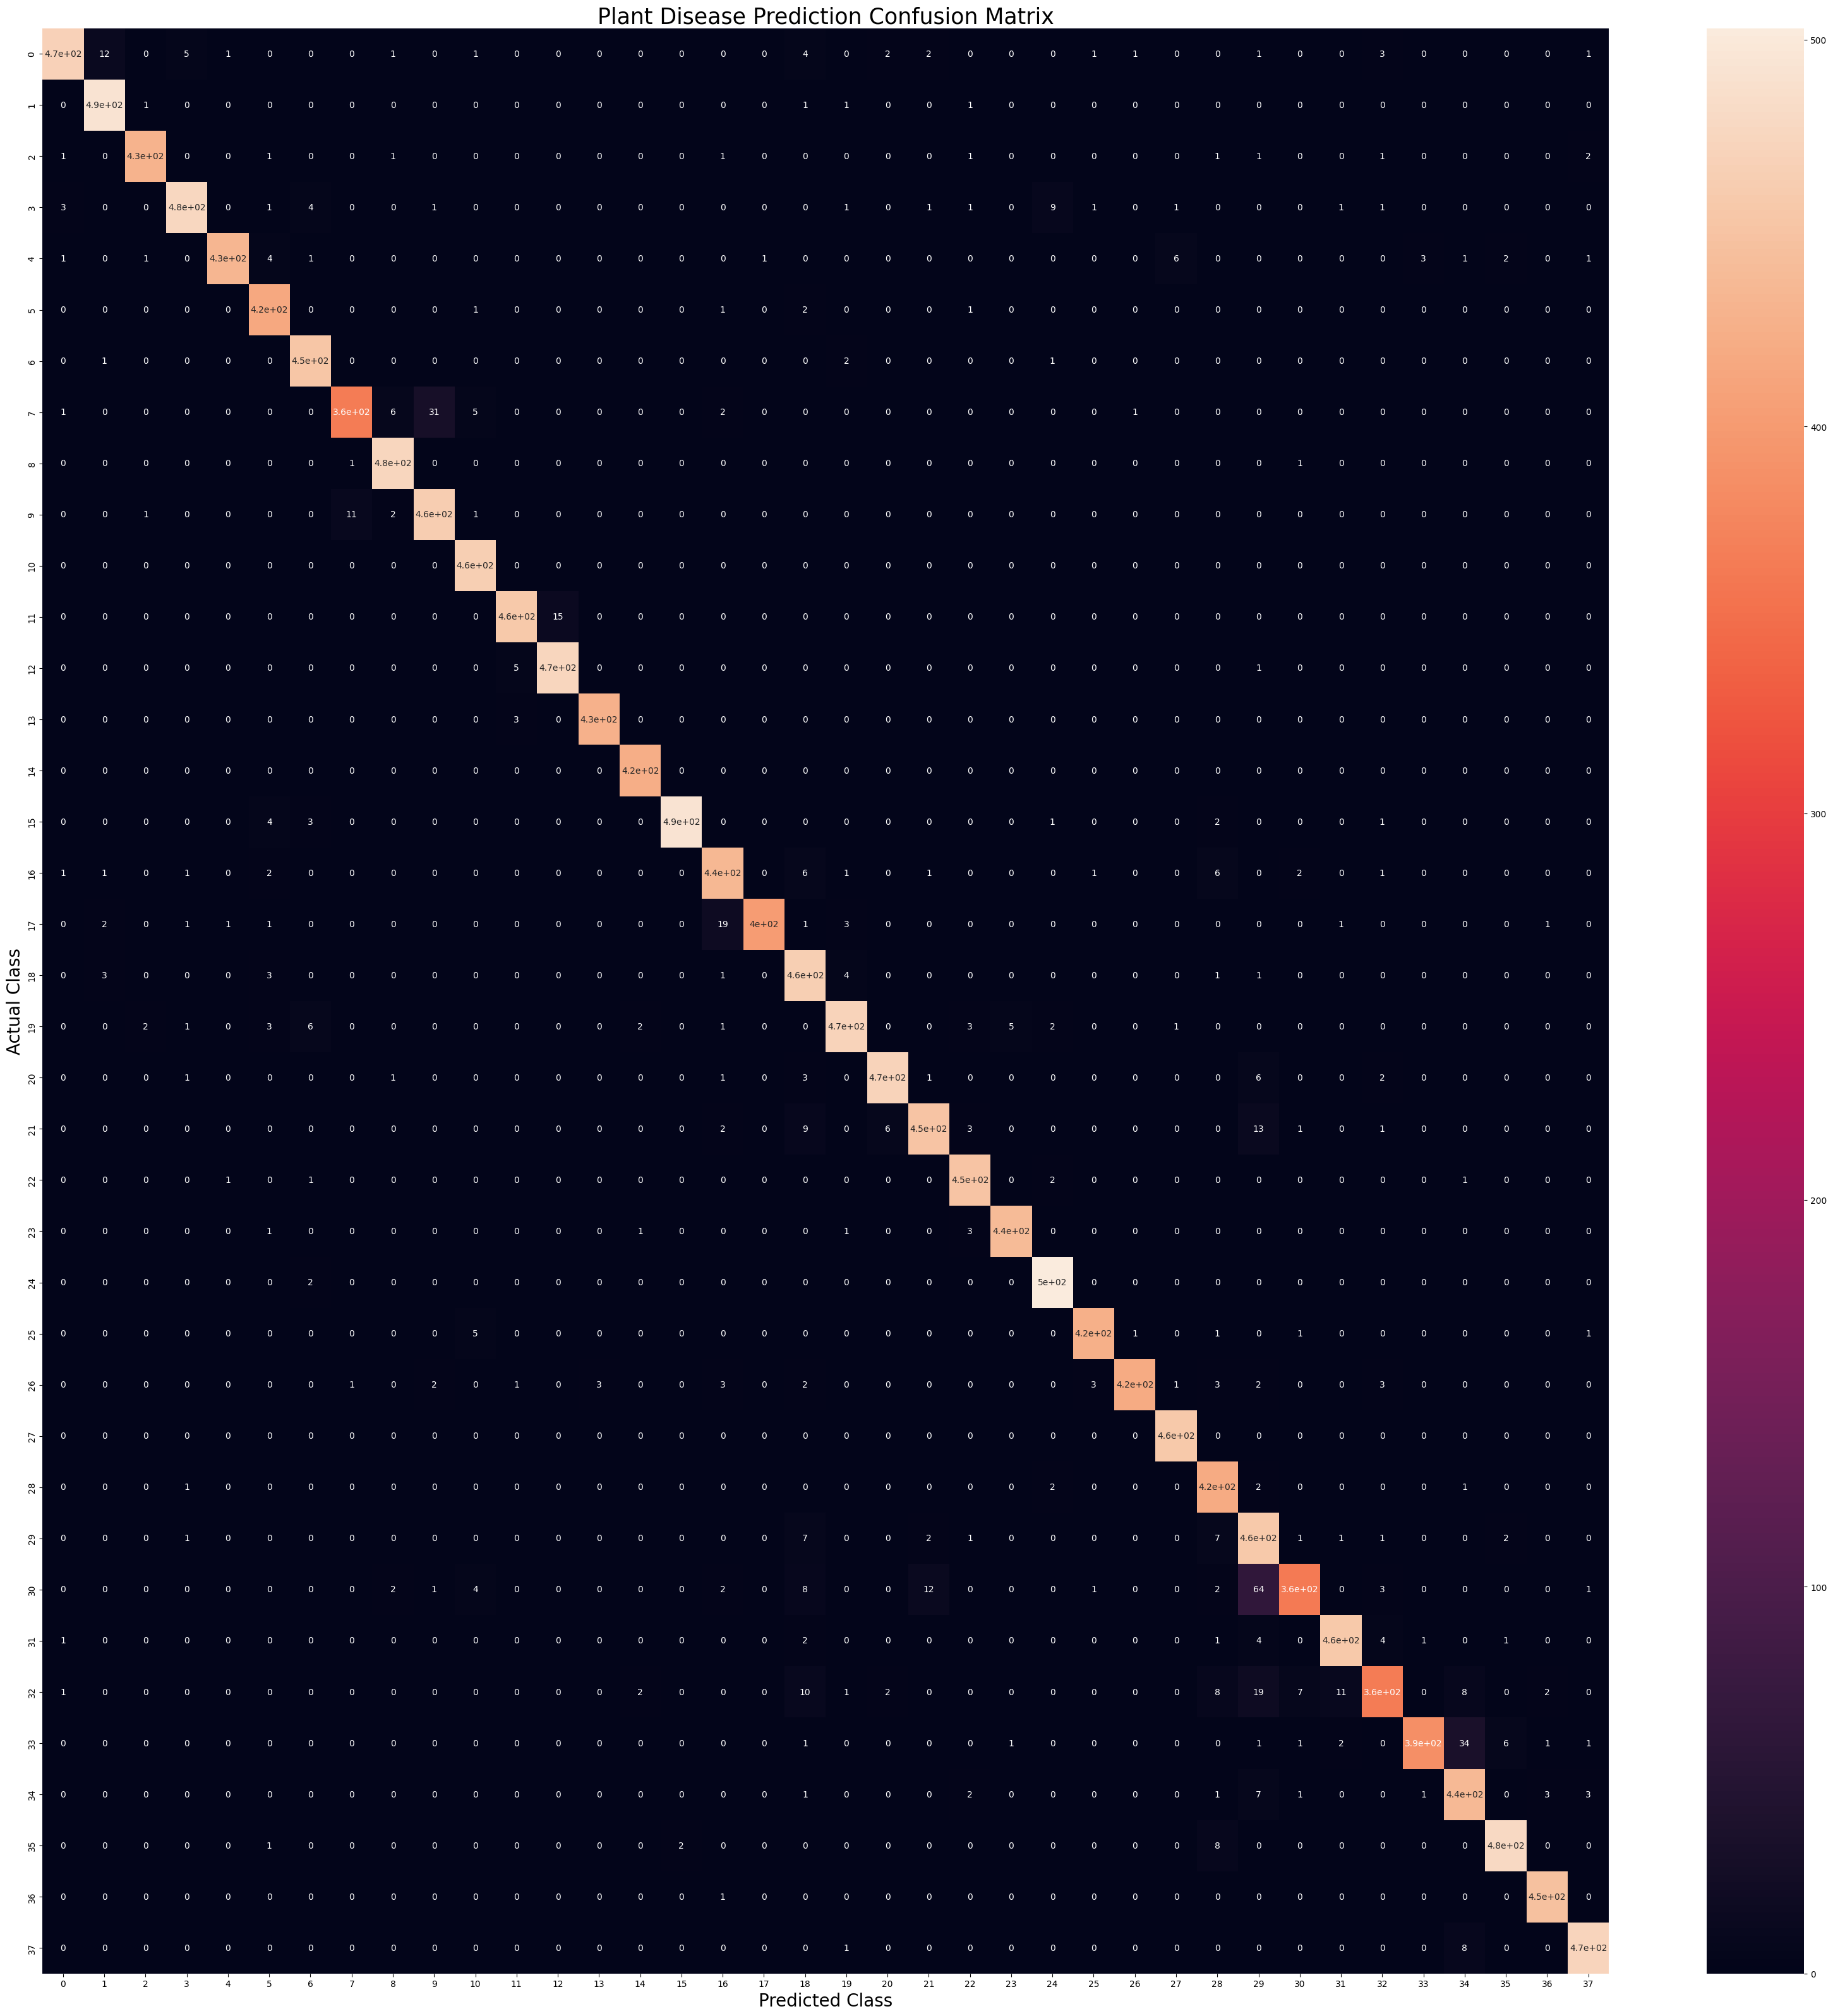

In [34]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [35]:
from google.colab import files
files.download('trained_plant_disease_model.keras')
files.download('training_hist.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>